In [12]:
#convert the dataset from files to a python DataFrame

import pandas as pd
import os

folder = 'aclImdb'

labels = {'pos': 1, 'neg': 0}

df = pd.DataFrame()

for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)
df.columns = ['review', 'sentiment']

df.head()


,review,sentiment
0,Previous reviewer Claudio Carvalho gave a much...,1
1,"CONTAINS ""SPOILER"" INFORMATION. Watch this dir...",1
2,This is my first Deepa Mehta film. I saw the f...,1
3,This was a great film in every sense of the wo...,1
4,"A stunningly well-made film, with exceptional ...",1


In [13]:
df.to_csv('movie_data.csv', index = False, encoding = 'utf-8')

df.head()

,review,sentiment
0,Previous reviewer Claudio Carvalho gave a much...,1
1,"CONTAINS ""SPOILER"" INFORMATION. Watch this dir...",1
2,This is my first Deepa Mehta film. I saw the f...,1
3,This was a great film in every sense of the wo...,1
4,"A stunningly well-made film, with exceptional ...",1


In [14]:
import nltk

nltk.download('punkt')

from nltk.tokenize import word_tokenize

reviews = df.review.str.cat(sep=' ')


[nltk_data] Downloading package punkt to /home/aiml/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
reviews[0:10]

'Previous r'

In [16]:
#function to split text into word

tokens = word_tokenize(reviews)

vocabulary = set(tokens)

print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)

sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]



199786


['the',
 ',',
 '.',
 'a',
 'and',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 'was',
 'The',
 'as',
 'with',
 'movie',
 'for',
 'film',
 ')',
 '(',
 'but',
 "''",
 "n't",
 '``',
 'on',
 'you',
 'are',
 'not',
 'have',
 'his',
 'be',
 '!',
 'he',
 'one',
 'at',
 'by',
 'an',
 'all',
 'who',
 'they',
 'from',
 'like',
 'It']

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tokens = [w for w in tokens if w not in stop_words]

[nltk_data] Downloading package stopwords to /home/aiml/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[',',
 '.',
 '/',
 '>',
 '<',
 'br',
 'I',
 "'s",
 'The',
 'movie',
 'film',
 ')',
 '(',
 "''",
 "n't",
 '``',
 '!',
 'one',
 'like',
 'It',
 '?',
 'This',
 'good',
 'would',
 '...',
 'time',
 'really',
 'see',
 'even',
 'story',
 ':',
 '-',
 "'",
 'much',
 'could',
 'get',
 'people',
 'bad',
 'great',
 'well',
 'first',
 'made',
 'also',
 'make',
 'way',
 'movies',
 'But',
 'think',
 'characters',
 'character']

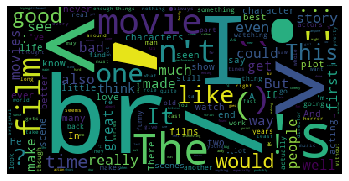

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

In [21]:
X_train = df.loc[:24999, 'review'].values

y_train = df.loc[:24999, 'sentiment'].values

X_test = df.loc[25000:, 'review'].values

y_test = df.loc[25000:, 'sentiment'].values

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)

train_vectors = vectorizer.fit_transform(X_train)

test_vectors = vectorizer.transform(X_test)

print(train_vectors.shape, test_vectors.shape)

/home/aiml/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


(25000, 10000) (25000, 10000)


In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)


In [24]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(test_vectors)

print(accuracy_score(y_test,predicted))

0.84188


## ref: https://www.geeksforgeeks.org/generating-word-cloud-python/

In [139]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [140]:
df = pd.read_csv(r"Youtube02-KatyPerry.csv", encoding ="latin-1")

In [141]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [142]:
comment_words = ' '

stop_words = set(STOPWORDS)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [143]:
comment_words = ' '

stop_words = set(STOPWORDS)

for val in df.CONTENT:
    
#     val = val.astype(str)
    
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    for words in tokens:
        comment_words = comment_words + words + ' '     
        
        

    

In [144]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 

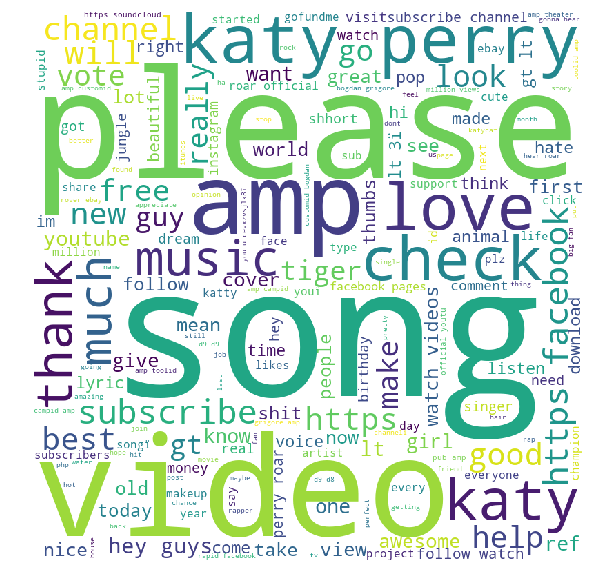

In [145]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## my own implementation

In [146]:
from wordcloud import WordCloud,STOPWORDS

data = pd.read_csv(r"Youtube05-Shakira.csv", encoding ="latin-1")
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice songï»¿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ï»¿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,PrÃ¬Ã±Ã§eÅÅ ÃliÅ ÅÃ¸vÃª DÃ¸mÃ­Ã±Ã¸ MÃ¢Äi...,2015-05-28T21:00:08.607000,I love song ï»¿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena LÃ³pez,2015-05-28T17:08:29.827000,shakira is best for worldcupï»¿,0


In [147]:
def display_wordcloud(data):
    tokens = []
    comments = ' '
    for val in data:
#         val = str(val)
        tokens = val.split()
        
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            
        for words in tokens:
            comments = comments + words + ' '
            
        
    wordcloud = WordCloud(width= 800, height= 800, stopwords = stop_words, \
                   background_color="white", max_words=2000, max_font_size=100).generate(comments)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [148]:
def display_wordcloud(data):
    tokens = []
    comments = ' '
    for val in data:
#         val = str(val)
        tokens = val.split()
        
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            
        comments = comments + ' '.join([word for word in tokens])
    wordcloud = WordCloud(width= 800, height= 800, stopwords = stop_words, \
                   background_color="white", max_words=2000, max_font_size=100).generate(comments)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

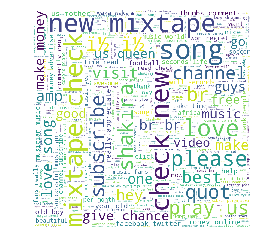

In [149]:
display_wordcloud(data.CONTENT)